# Cardio Goodness fit 

**Using the data we are going to predict the number of miles run on tredmill of a person based on various factors mentioned in the dataset**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiogoodfitness/CardioGoodFitness.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [3]:
df=pd.read_csv("../input/cardiogoodfitness/CardioGoodFitness.csv")

In [4]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


Miles is the dependent variable and the rest of them are independent variable. We will try to explore the feature engineering using various plots and choose the suitable independent variables.

In [6]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [8]:
df.shape

(180, 9)

**There are no missing values in all the given columns and there are 180 records in total**

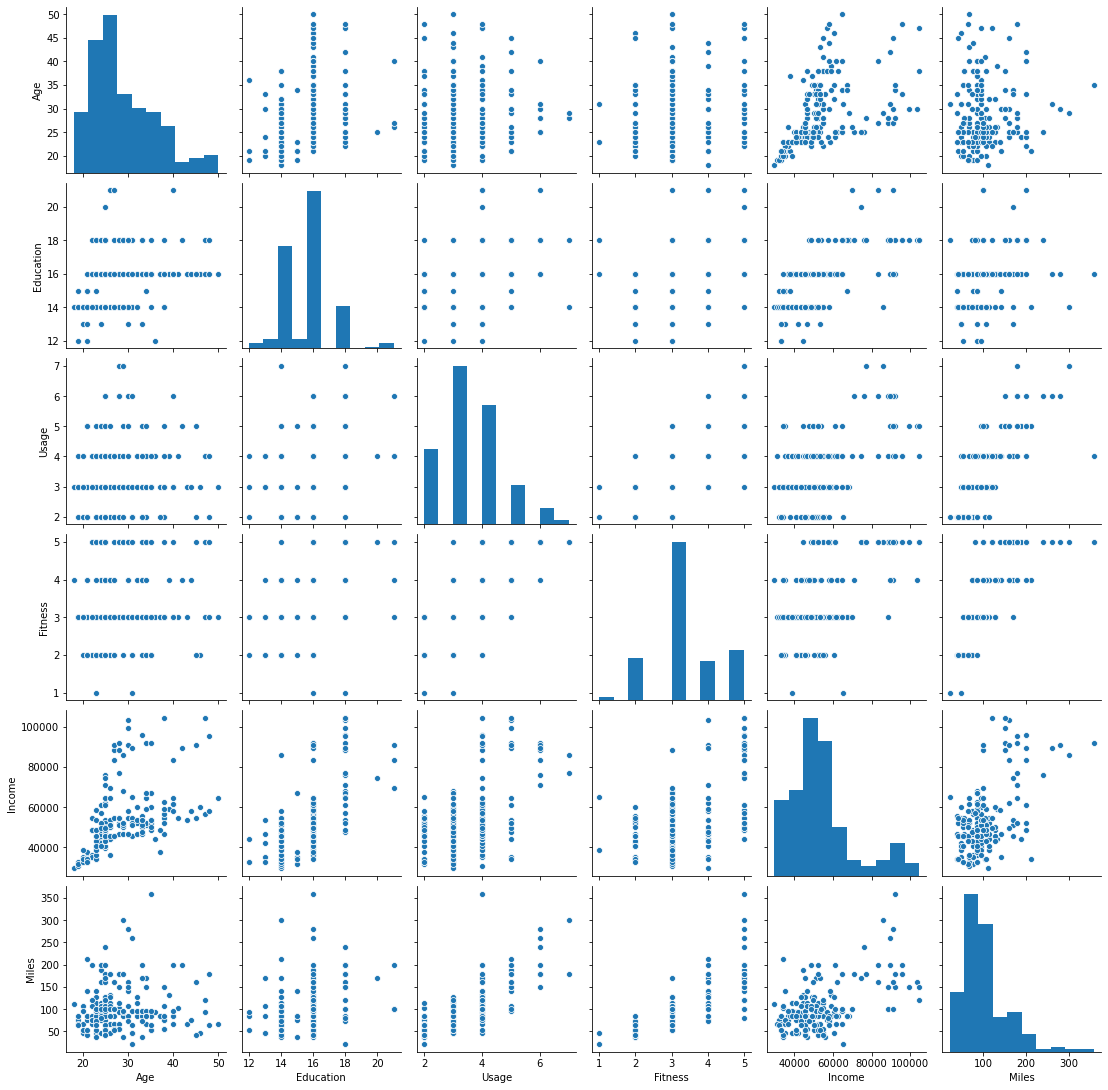

In [14]:
sns.pairplot(df)

**From the above plot, we can say that the age and miles are highly corelated, so when the age increases the miles also increases, they are direcly propotional to each other**

**Fitness and usage are slightly correlated with miles**

**Age and income are positively corrleated**

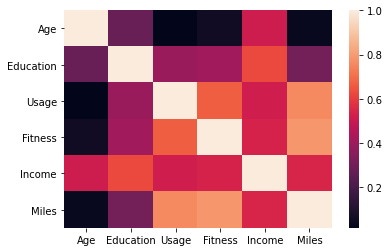

In [16]:
sns.heatmap(df.corr())

**Heatmap is used to visualize the correlated variables easily. We can see that , in the miles field, usage and fitness are highly correlated than any other variables.**

# Exploratory data analysis

**Let's get some insights about the data  by exploring it**

In [17]:
pd.crosstab(df['Product'],df['MaritalStatus'])

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


**It is observed that the partnered peoples buy each products more than singles**

In [18]:
pd.crosstab(df['Product'],df['Gender'])

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


**From the above data, it's clear that males are purchasing products more than females**

In [19]:
pd.pivot_table(df,'Income',index=['Product','Gender'],columns=['MaritalStatus'])

MaritalStatus      Partnered        Single
Product Gender                            
TM195   Female  46153.777778  45742.384615
        Male    50028.000000  43265.842105
TM498   Female  49724.800000  48920.357143
        Male    49378.285714  47071.800000
TM798   Female  84972.250000  58516.000000
        Male    81431.368421  68216.428571

**From the table,in many cases, income of females is more than males**

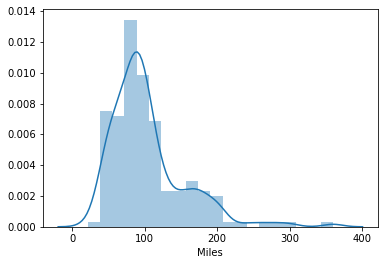

In [20]:
sns.distplot(df['Miles'])

**Most of points of miles are around 100's to 200's and many are under 100 miles and few are greater than 250 miles**

# Dependent & Independent variable

**From the feature engineering part, we saw that usage and fitness are highly correlated with miles varaible, So take these two as independent variable to predict miles, the dependent variable**

In [23]:
x=df[['Usage','Fitness']]

y=df['Miles']

# Train test split

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2)

In [26]:
from sklearn.linear_model import LinearRegression

reg=LinearRegression()

reg.fit(xtrain,ytrain)

LinearRegression()

**Test accuracy score**

In [29]:
score=reg.score(xtest,ytest)
score*100

65.64615658867459

**Train accuracy score**

In [30]:
score=reg.score(xtrain,ytrain)
score*100

72.57189529179679

**It is seen that the train and test score are good and it didn't perform well on the test data**